In [24]:
import pandas as pd
import os, glob, inspect, sys
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 
import epri_mc_lib as mc
from importlib import reload
reload(mc)

<module 'epri_mc_lib' from '/home/nick/Bureau/Programming/S2DS/Oct20_EPRI/Task1/NB/epri_mc_lib.py'>

In [42]:
data_path = "../../Data/Merged_data"
df = pd.read_csv(os.path.join(data_path, 'ALL_TUBE_PIPE_merge_1.csv'), 
                 index_col=0)
df = df.iloc[:16,:]

In [43]:
df["AUC_avg"] = mc.findAUC(df, df['A'], df['B'], df['p'])
df.drop(columns=["A","B","p",'Absorption_avg_500','Absorption_avg_200',"mean_perm","mean_MBN","mean_CF"]+mc.errors_list,inplace=True)
df.dropna(axis=1, inplace=True)
df.dropna(axis=0, inplace=True)

In [44]:
scaled_df, scaler = mc.scale_general(df,MinMaxScaler())


In [45]:
pca = PCA(n_components=4, svd_solver='full')
pca.fit(scaled_df)


PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)

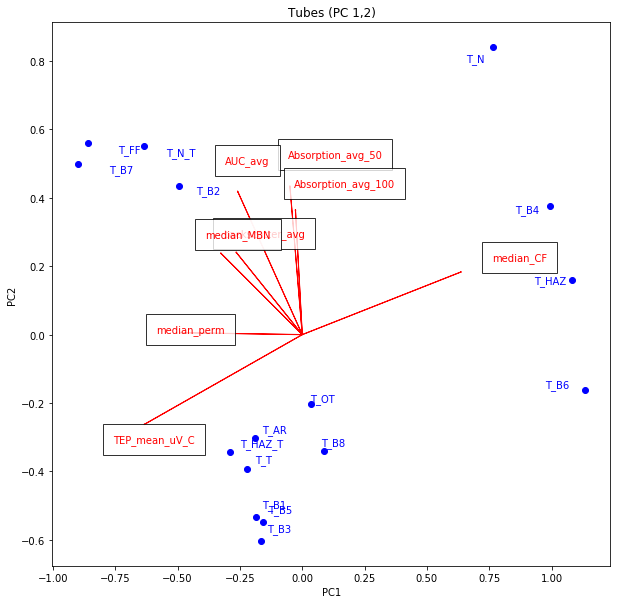

In [51]:
mc.biplot(pca, scaled_df, 0,1, "Tubes (PC 1,2)")

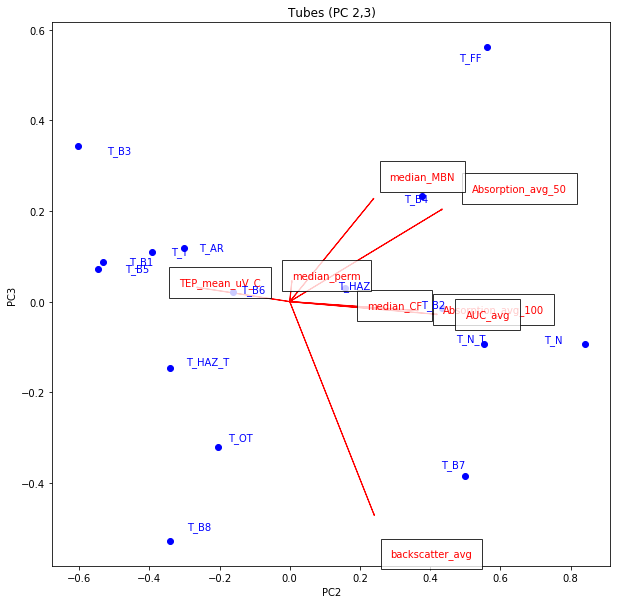

In [49]:
mc.biplot(pca, scaled_df, 1,2, "Tubes (PC 2,3)")

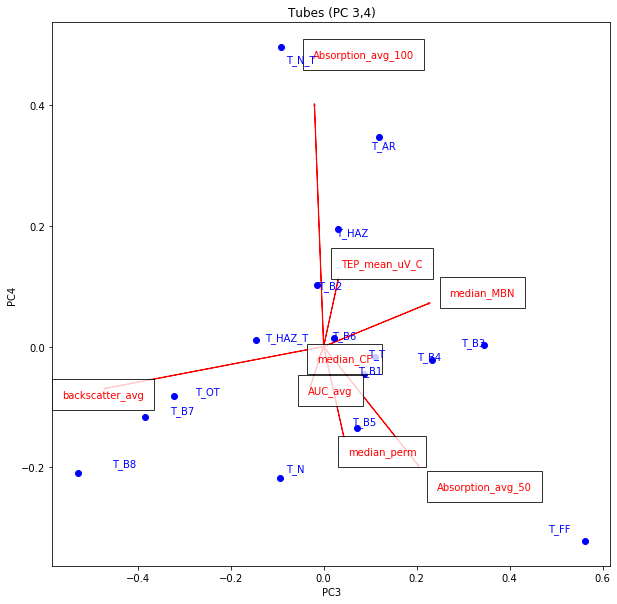

In [50]:
mc.biplot(pca, scaled_df, 2,3, "Tubes (PC 3,4)")